<a href="https://colab.research.google.com/github/kavyaaaa16/Sentiment_analysis/blob/main/twitter%26trainlabel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
test_df= pd.read_csv('/content/train_labeled.csv')
test_df

,title,author,rating,rating_count,genre,review,label
0,No One Was Supposed to Die at This Wedding,Catherine Mack,3.76,"1,373",Mystery,book 2 in the vacation mysteries kicks off wit...,positive
1,One in Four,Lucinda Berry,3.42,"6,402",Thriller,a complex heartrending plot one in four was th...,positive
2,A Court of Mist and Fury,Sarah J. Maas,4.64,"2,865,240",Fantasy,when i finished this book the mountains trembl...,positive
3,The Love Haters,Katherine Center,3.93,"16,714",Romance,5,neutral
4,Pet Sematary,Stephen King,4.08,"661,096",Horror,cause what you buy is what you own and what yo...,neutral
...,...,...,...,...,...,...,...
1123,Dracula,"Bram Stoker, Rubén Toledo (Illustrations), Nin...",4.02,"1,400,904",Classics,two things about this book1 it is a really gre...,positive
1124,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,"3,659,032",Fantasy,is it true that you shouted at professor umbri...,positive
1125,The Gilded Cage,Lynette Noni,4.27,"87,819",Fantasy,ending went absolutely crazy yet again,negative
1126,Breath: The New Science of a Lost Art,James Nestor,4.15,"105,849",Nonfiction,in terms of single subject science books breat...,positive


In [4]:
twitter=pd.read_csv('/content/twitter_training.csv')
twitter

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [5]:
twitter.columns=['id', 'category','label', 'review']
twitter

,id,category,label,review
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [6]:
twitter.isnull().sum()

,0
id,0
category,0
label,0
review,686


In [7]:
twitter.dropna(subset=['review'],inplace=True)
twitter.isnull().sum()

,0
id,0
category,0
label,0
review,0


In [8]:
twitter.drop(['id', 'category'], axis='columns')

,label,review
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
...,...,...
74676,Positive,Just realized that the Windows partition of my...
74677,Positive,Just realized that my Mac window partition is ...
74678,Positive,Just realized the windows partition of my Mac ...
74679,Positive,Just realized between the windows partition of...


In [9]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 24.1 MB/s eta 0:00:00


In [10]:
import re
import emoji

def cleaning(text):
  text=text.lower()
  text=emoji.replace_emoji(text, replace='')
  text=re.sub(r"http\S+", "", text)
  text= re.sub(r"[^a-zA-Z0-9\s]", "", text)
  text=re.sub(r"(.)\1{2,}", r"\1", text)
  text=re.sub(r"\s+", " ", text).strip()
  return text

twitter['review']=twitter['review'].astype(str).apply(cleaning)

In [11]:
valid_labels=['Positive', 'Negative', 'Neutral']
twitter=twitter[twitter['label'].isin(valid_labels)]
twitter=twitter.reset_index(drop=True)

In [12]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

topword_list=stopwords.words('english') #will give a list of stopwords
stop=set(stopwords.words('english'))  #we convert it to set for faster checking
print(stop)

{'y', 'what', 'we', "weren't", 'those', 'when', "won't", 'who', 'these', 'them', "he'll", "you'll", 'some', "we're", "we'd", 'now', 'should', 'same', 'below', 'theirs', 'isn', 'because', "hasn't", 'than', 'myself', "they're", 'doesn', 'an', 'to', 'after', 'himself', 'itself', 's', 'shan', 'do', "they'll", 'from', 'being', 'as', 'haven', 'shouldn', "she's", 'had', 'he', "isn't", 'didn', 'about', 'between', 'off', 'with', 've', 'through', "wouldn't", 'not', 'him', "doesn't", 'other', 'above', "hadn't", 'no', 'mightn', 'then', 'few', 'if', 'in', 'under', 'couldn', 'yourself', 'it', "they've", 'were', 'they', 'just', 'up', 'o', 'by', 'needn', 'on', 'herself', "shouldn't", "wasn't", 'will', "i've", 'my', 'this', 'more', 'his', 'each', 'nor', "that'll", "it'd", 'that', 'down', 'all', 'both', 'so', 'here', 'hadn', 'm', 'she', 'been', 'why', "it'll", 'before', 'its', 'but', 'd', "i'd", 'too', "should've", "needn't", 'have', 'only', 'how', 'at', 'or', 'are', 'their', "you'd", 'very', 'into', "s

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
def remove_stopwords(text):
  words=text.split()
  filtered=[w for w in words if w not in stop]
  return ' '.join(filtered)

twitter['review']=twitter['review'].apply(remove_stopwords)

In [14]:
twitter

,id,category,label,review
0,2401,Borderlands,Positive,coming borders kill
1,2401,Borderlands,Positive,im getting borderlands kill
2,2401,Borderlands,Positive,im coming borderlands murder
3,2401,Borderlands,Positive,im getting borderlands 2 murder
4,2401,Borderlands,Positive,im getting borderlands murder
...,...,...,...,...
61115,9200,Nvidia,Positive,realized windows partition mac like 6 years be...
61116,9200,Nvidia,Positive,realized mac window partition 6 years behind n...
61117,9200,Nvidia,Positive,realized windows partition mac 6 years behind ...
61118,9200,Nvidia,Positive,realized windows partition mac like 6 years be...


In [15]:
test_df['review']=test_df['review'].astype(str).apply(cleaning)

In [16]:
test_df=test_df.drop(['title','author', 'rating','rating_count', 'genre'], axis='columns')


In [17]:
test_df

,review,label
0,book 2 in the vacation mysteries kicks off wit...,positive
1,a complex heartrending plot one in four was th...,positive
2,when i finished this book the mountains trembl...,positive
3,5,neutral
4,cause what you buy is what you own and what yo...,neutral
...,...,...
1123,two things about this book1 it is a really gre...,positive
1124,is it true that you shouted at professor umbri...,positive
1125,ending went absolutely crazy yet again,negative
1126,in terms of single subject science books breat...,positive


In [18]:
test_df['review']=test_df['review'].apply(remove_stopwords)
test_df

,review,label
0,book 2 vacation mysteries kicks bang another m...,positive
1,complex heartrending plot one four epitome luc...,positive
2,finished book mountains trembleddo need remind...,positive
3,5,neutral
4,cause buy always comes home youlouis creed fam...,neutral
...,...,...
1123,two things book1 really great creepy story des...,positive
1124,true shouted professor umbridgeyesyou called l...,positive
1125,ending went absolutely crazy yet,negative
1126,terms single subject science books breath bit ...,positive


In [19]:
# Fix label typos and standardize to lowercase
def clean_label(label):
    label = label.lower()
    if label == 'neagtive':
        return 'negative'
    return label

twitter['label'] = twitter['label'].apply(clean_label)
test_df['label'] = test_df['label'].apply(clean_label)


In [20]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer( min_df=1, max_df=1.0)
cv_train=cv.fit_transform(twitter['review'])
cv_test=cv.transform(test_df['review'])

print('BOW_cv_train:', cv_train.shape)
print('BOW_cv_val:', cv_test.shape)

BOW_cv_train: (61120, 33876)
BOW_cv_val: (1128, 33876)


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv=TfidfVectorizer(min_df=1, max_df=1.0, use_idf=True)
tv_train=tv.fit_transform(twitter['review'])
tv_test=tv.transform(test_df['review'])

print('TFIDF_train:', tv_train.shape)
print('TFIDF_test:', tv_test.shape)

TFIDF_train: (61120, 33876)
TFIDF_test: (1128, 33876)


In [22]:
y_train=twitter['label']
y_test=test_df['label']

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

lr=LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(tv_train,y_train)
y_pred=lr.predict(tv_test)
lr_tv_score= accuracy_score(y_test, y_pred)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(lr_tv_score)

              precision    recall  f1-score   support

    negative       0.27      0.35      0.31       133
     neutral       0.16      0.46      0.23       156
    positive       0.87      0.51      0.64       839

    accuracy                           0.49      1128
   macro avg       0.43      0.44      0.39      1128
weighted avg       0.70      0.49      0.55      1128

[[ 47  57  29]
 [ 47  71  38]
 [ 79 330 430]]
0.4858156028368794


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr=LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(cv_train,y_train)
y_pred=lr.predict(cv_test)
lr_cv_score= accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(lr_cv_score)

              precision    recall  f1-score   support

    negative       0.30      0.27      0.29       133
     neutral       0.14      0.56      0.23       156
    positive       0.84      0.39      0.54       839

    accuracy                           0.40      1128
   macro avg       0.43      0.41      0.35      1128
weighted avg       0.68      0.40      0.46      1128

[[ 36  72  25]
 [ 31  87  38]
 [ 52 456 331]]
0.4024822695035461


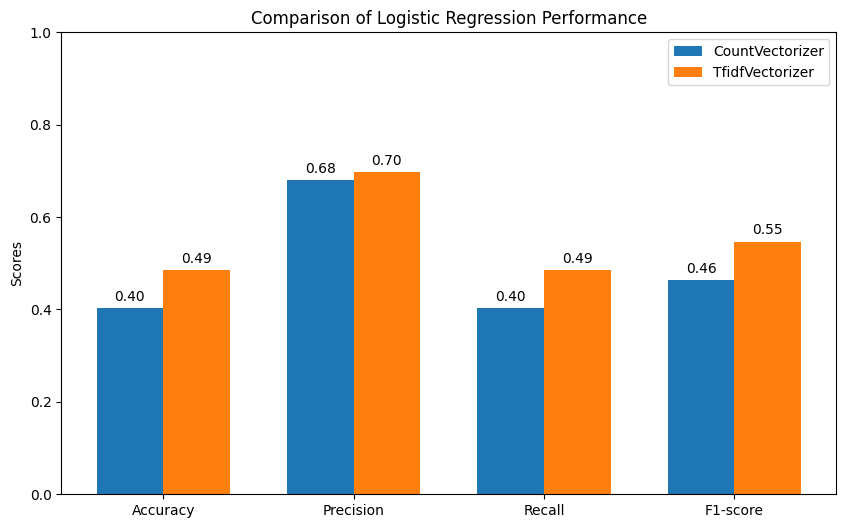

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Train and predict function to get metrics
def get_metrics(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, class_weight='balanced')

# Get metrics for CountVectorizer features
acc_cv, prec_cv, rec_cv, f1_cv = get_metrics(lr, cv_train, y_train, cv_test, y_test)

# Get metrics for TfidfVectorizer features
acc_tv, prec_tv, rec_tv, f1_tv = get_metrics(lr, tv_train, y_train, tv_test, y_test)

# Prepare data for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
cv_scores = [acc_cv, prec_cv, rec_cv, f1_cv]
tv_scores = [acc_tv, prec_tv, rec_tv, f1_tv]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
bars1 = ax.bar(x - width/2, cv_scores, width, label='CountVectorizer')
bars2 = ax.bar(x + width/2, tv_scores, width, label='TfidfVectorizer')

# Add labels and title
ax.set_ylabel('Scores')
ax.set_title('Comparison of Logistic Regression Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim([0,1])
ax.legend()

# Show score values on bars
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0,3), textcoords="offset points",
                    ha='center', va='bottom')

add_values(bars1)
add_values(bars2)

plt.show()


In [26]:
from sklearn.svm import LinearSVC   #faster

svm=LinearSVC(class_weight='balanced', max_iter=10000)
svm.fit(tv_train,y_train)
y_pred_svm=svm.predict(tv_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {acc_svm:.4f}")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.4725
              precision    recall  f1-score   support

    negative       0.24      0.33      0.28       133
     neutral       0.14      0.41      0.21       156
    positive       0.85      0.51      0.63       839

    accuracy                           0.47      1128
   macro avg       0.41      0.42      0.38      1128
weighted avg       0.68      0.47      0.53      1128



In [27]:
twitter.shape

(61120, 4)

In [29]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Encode labels to 0, 1, 2
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(tv_train, y_train_encoded)

# Predict and evaluate
y_pred_xgb = xgb.predict(tv_test)
print("XGBoost Accuracy:", accuracy_score(y_test_encoded, y_pred_xgb))
print(classification_report(y_test_encoded, y_pred_xgb, target_names=le.classes_))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:12:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.3776595744680851
              precision    recall  f1-score   support

    negative       0.22      0.44      0.29       133
     neutral       0.12      0.39      0.18       156
    positive       0.88      0.36      0.52       839

    accuracy                           0.38      1128
   macro avg       0.41      0.40      0.33      1128
weighted avg       0.70      0.38      0.44      1128



In [33]:
acc_xg= accuracy_score(y_test_encoded, y_pred_xgb)
acc_xg

0.3776595744680851